###Name:Dibyanshu Ratna Bajracharya
###Class:L5GC2
###Student Id: 2408571

# 3 To - Do - Task
Please Complete all the problem listed below.

##3.1 Warming Up Exercises - Basic Inspection and Exploration:
**Problem 1 - Data Read, Write and Inspect:
Complete all following Task:**

• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [5]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/AI/Week2_Dataset/bank .csv")

#Q1
df = pd.DataFrame(dataset)

#Q2
#a
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)
print("\n")

#b
for col in object_columns:
    unique_vals = df[col].unique()
    print(f"Unique values in '{col}':", unique_vals)


#c
print("Total null value in each column:\n",df.isnull().sum())

#Q3
df_numeric = df.select_dtypes(exclude='object')
df_numeric.to_csv("banknumericdata.csv", index=False)

#Q4
df_numeric_sum = pd.read_csv("banknumericdata.csv")
print(df_numeric_sum.head(),"\n")
print(df_numeric_sum.describe())

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


Unique values in 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in 'marital': ['married' 'single' 'divorced']
Unique values in 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in 'default': ['no' 'yes']
Unique values in 'housing': ['yes' 'no']
Unique values in 'loan': ['no' 'yes']
Unique values in 'contact': ['unknown' 'cellular' 'telephone']
Unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in 'poutcome': ['unknown' 'failure' 'other' 'success']
Unique values in 'y': ['no' 'yes']
Total null value in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      

**Problem 2 - Data Imputations:**

Complete all the following Task:

• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [15]:
import pandas as pd
#Q1
df_medical = pd.read_csv("/content/drive/MyDrive/AI/Week2_Dataset/medical_students_dataset.csv")
df_medical.head()

#Q2
print(df_medical.info())
print("\nNumber of missing values in each column:")
print(df_medical.isnull().sum())

#Q3
for col in df_medical.columns:
  if df_medical[col].isnull().sum() > 0:
    if df_medical[col].dtype == 'object':
      #Filled categorical column with mode
      df_medical[col] = df_medical[col].fillna(df_medical[col].mode()[0])
    else:
      #Filled numeric columns with mean
      df_medical[col] = df_medical[col].fillna(df_medical[col].mean())
print("\nMissing values after filling:")
print(df_medical.isnull().sum())


#Q4
print("\nNumber of duplicate rows:", df_medical.duplicated().sum())
df_medical = df_medical.drop_duplicates()
print("\nNumber of duplicate rows after removing:", df_medical.duplicated().sum())
print("\nNumber of rows after removing duplicates:", len(df_medical))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Number of missing values in each column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Wei

###3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:###
Dataset Used: "titanic.csv"

**Problem - 1:**
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [18]:
import pandas as pd
df_titanic = pd.read_csv("/content/drive/MyDrive/AI/Week2_Dataset/Titanic-Dataset.csv")

df_subset = df_titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
df_firstClass = df_subset[df_subset['Pclass']==1]

mean_fare = df_firstClass['Fare'].mean()
median_fare = df_firstClass['Fare'].median()
max_fare = df_firstClass['Fare'].max()
min_fare = df_firstClass['Fare'].min()

print("Fare Stats of First Class Passangers:")
print("Mean Fare:",mean_fare)
print("Median Fare:",median_fare)
print("Max Fare:",max_fare)
print("Min Fare:",min_fare)


Fare Stats of First Class Passangers:
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0


**Problem - 2:**
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found this out, drop them from your DataFrame.

In [21]:
age_null = df_firstClass['Age'].isnull().sum()
print(f"Null value in Age Column:{age_null}")

drop_null = df_firstClass.dropna(subset=['Age'])
print(f"Number of rows after dropping null values: {len(drop_null)}")

Null value in Age Column:30
Number of rows after dropping null values: 186


**Problem - 3:**

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka- tion:

• ’C’ for Cherbourg

• ’Q’ for Queenstown

• ’S’ for Southampton

Task:

Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’, ’Embarked Q’, ’Embarked S’).
Add these new columns to the original DataFrame.
Drop the original ’Embarked’ column.
Print the first few rows of the modified DataFrame to verify the changes.

In [22]:
embarked_encoded = pd.get_dummies(df_titanic['Embarked'], prefix='Embarked')

df_titanic = pd.concat([df_titanic, embarked_encoded], axis=1)
df_titanic = df_titanic.drop(columns=['Embarked'])

print(df_titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


**Problem - 4:**

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual- ization to show how the survival distributions vary by gender.

Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


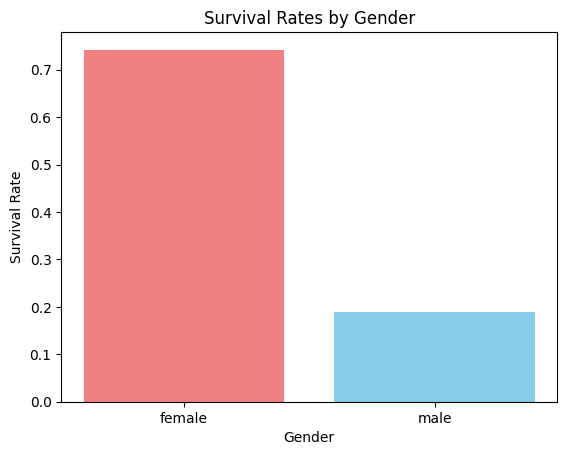

In [24]:
import matplotlib.pyplot as plt

survival_rates_gender = df_titanic.groupby('Sex')['Survived'].mean()
print("Survival Rates by Gender:")
print(survival_rates_gender)


plt.bar(survival_rates_gender.index, survival_rates_gender.values, color=['lightcoral', 'skyblue'])
plt.title("Survival Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

**Problem - 5:**

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

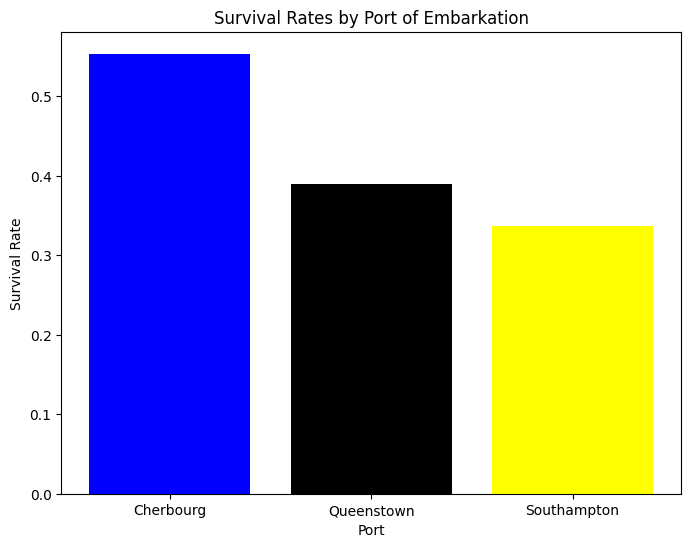

In [26]:
survival_rates_port = {
    'Cherbourg': df_titanic.loc[df_titanic['Embarked_C'] == 1, 'Survived'].mean(),
    'Queenstown': df_titanic.loc[df_titanic['Embarked_Q'] == 1, 'Survived'].mean(),
    'Southampton': df_titanic.loc[df_titanic['Embarked_S'] == 1, 'Survived'].mean(),
}

plt.figure(figsize=(8, 6))
plt.bar(survival_rates_port.keys(), survival_rates_port.values(), color=['blue', 'black', 'yellow'])
plt.title("Survival Rates by Port of Embarkation")
plt.xlabel("Port")
plt.ylabel("Survival Rate")
plt.show()